### Install Libraries

In [ ]:
!pip install JasonUtils
!pip install sklearn_som
!pip install codetiming
!pip install sklearn_som
!pip install minisom

     |████████████████████████████████| 1.3 MB 9.2 MB/s 
     |████████████████████████████████| 2.0 MB 56.4 MB/s 
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp37-cp37m-linux_x86_64.whl size=2065928 sha256=32426831ee783a117eb9ded85ddc1c0d42207619114d40b0a7899783660e256e
  Stored in directory: /root/.cache/pip/wheels/9a/d6/39/e26b6f988cc5acd1fba2c1b18f0debe27bdee3e1e53f4c93f9
Successfully built simpleaudio
  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=7e1d3c5fee156c0093cd9abcf33bf56bb6ea8e4d02f0e0a56af67fc7a1aacfea
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


### Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, silhouette_score
from sklearn import svm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone
from collections import defaultdict
from JasonUtils.TicToc import timing
from sklearn.cluster import DBSCAN
from sklearn.utils.multiclass import unique_labels
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### (1) Load Dataset

In [ ]:
pokemon_train = pd.read_csv("/content/gdrive/MyDrive/Pokemon_train.csv")
pokemon_test = pd.read_csv("/content/gdrive/MyDrive/Pokemon_test.csv")
print(len(pokemon_train))
print(len(pokemon_test))

display(pokemon_train.head())

1251
313


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,2.000000,2.000000,2.0,95.000000,7680.000000,70.000000,355.000000,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,rock
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,2.038386,0.990403,0.495202,0.490403,0.990403,0.990403,1.980807,2.0,133.464544,3864.567294,70.000000,515.191932,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,rock
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.5,70.000000,5120.000000,70.000000,310.000000,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,water
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,2.0,123.588302,8491.030113,70.000000,527.747870,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,fire
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,0.337473,1.662527,1.000000,2.000000,1.000000,1.662527,2.000000,1.0,56.749463,2560.000000,93.623119,524.076666,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,fairy


#### (1.1) Prepare the data

In [ ]:
X_train = pokemon_train.drop('type1',axis=1).values
y_train = pokemon_train['type1']
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)

X_test = pokemon_test.drop('type1',axis=1).values
y_test = pokemon_test['type1']
y_test = le.fit_transform(y_test)

### (2) Apply Gaussian Naïve Bayes classifier (GNB) and Support Vector Machine (SVM)

#### (2.1) Gaussian Naïve Bayes classifier (GNB)


 testing accuracy :   0.514 

              precision    recall  f1-score   support

           0       0.18      0.44      0.26        16
           1       1.00      0.60      0.75        20
           2       0.56      0.94      0.70        16
           3       0.23      0.44      0.30        16
           4       0.56      1.00      0.72         9
           5       0.83      0.86      0.84        22
           6       0.35      0.67      0.46        18
           7       0.57      0.47      0.52        17
           8       0.00      0.00      0.00        18
           9       0.50      0.86      0.63        21
          10       0.50      0.43      0.46        21
          11       0.00      0.00      0.00        24
          12       0.50      0.50      0.50        20
          13       0.71      0.22      0.33        23
          14       0.83      0.67      0.74        15
          15       1.00      1.00      1.00        19
          16       0.50      0.06      0.10       

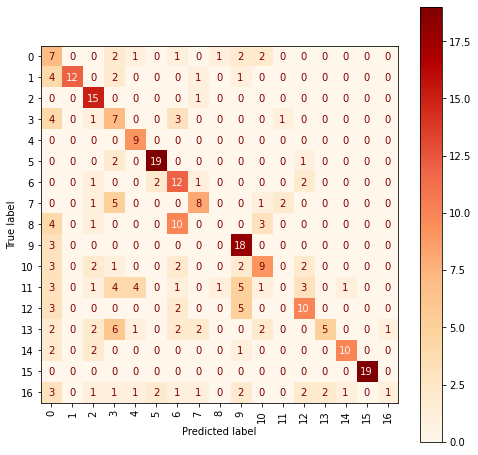

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)
y_predic_test = NB_model.predict(X_test)
test_accuracy_nb_base = accuracy_score(y_test, y_predic_test) 
print("\n testing accuracy :  "  ,round(test_accuracy_nb_base,3),"\n")
print(classification_report(y_test, y_predic_test))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB_model, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.OrRd, ax=ax);

#### (2.2) Support Vector Machine (SVM)


 testing accuracy :   0.121 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.29      0.94      0.44        16
           3       0.06      0.88      0.12        16
           4       0.22      1.00      0.36         9
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        19
          16       0.00      0.00      0.00       

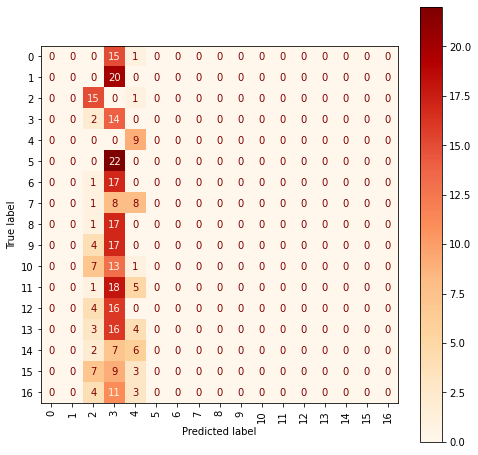

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)
y_predic_test2 = svm_model.predict(X_test)
test_accuracy_svm_base = accuracy_score(y_test, y_predic_test2) 
print("\n testing accuracy :  "  ,round(test_accuracy_svm_base,3),"\n")
print(classification_report(y_test, y_predic_test2))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.OrRd, ax=ax);

#### (2.3) Apply TSNE with (n_components=2) and visualize

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

print('Shape of the Training Data befor T-SNE:', X_train.shape)
print('Shape of the Training Data after T-SNE:', X_train_tsne.shape)
print('Shape of the Testing Data befor T-SNE:', X_test.shape)
print('Shape of the Testing Data after T-SNE:', X_test_tsne.shape)

Shape of the Training Data befor T-SNE: (1251, 32)
Shape of the Training Data after T-SNE: (1251, 2)
Shape of the Testing Data befor T-SNE: (313, 32)
Shape of the Testing Data after T-SNE: (313, 2)


##### (2.3.1) Visualize training data

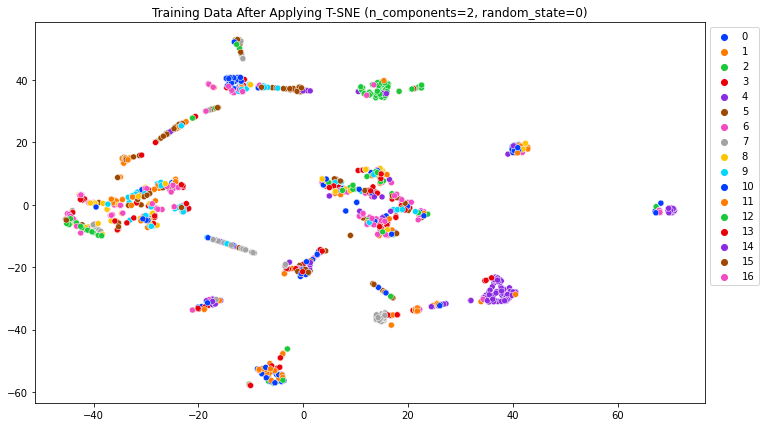

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(X_train_tsne[:,0], X_train_tsne[:,1], hue=y_train, legend='full', palette=sns.color_palette("bright", 17))
plt.legend(loc="upper left" , bbox_to_anchor=(1, 1))
plt.title("Training Data After Applying T-SNE (n_components=2, random_state=0)");

##### (2.3.2) Visualize training data

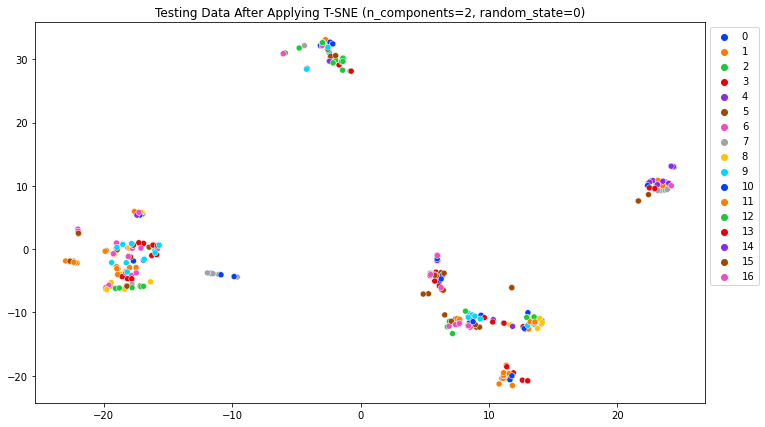

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(X_test_tsne[:,0], X_test_tsne[:,1], hue= y_test, legend='full', palette=sns.color_palette("bright", 17))
plt.legend(loc="upper left" , bbox_to_anchor=(1, 1))
plt.title("Testing Data After Applying T-SNE (n_components=2, random_state=0)");

### (3) Choose the best number of cluster for k-means clustering algorithm

#### (3.1) Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of clusters

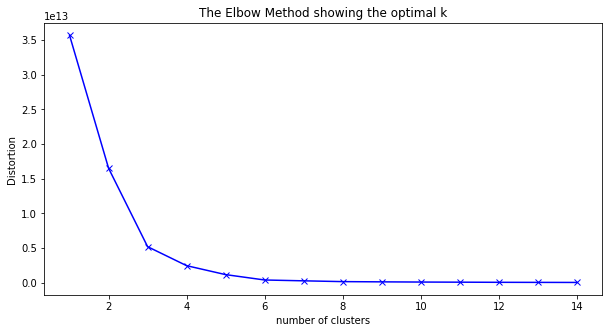

In [ ]:
distortions_km = []
for k in range(1,15):
    km_model = KMeans(n_clusters=k)
    km_model.fit(X_train)
    distortions_km.append(km_model.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,15), distortions_km, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show();

#### (3.2) Determine the optimal number of clusters for k-means

In [ ]:
# the optimal number of clustera is 4
km_model = KMeans(n_clusters=4)
km_preds = km_model.fit_predict(X_train)

#### (3.3) Plot clustered data with optimum number of clusters

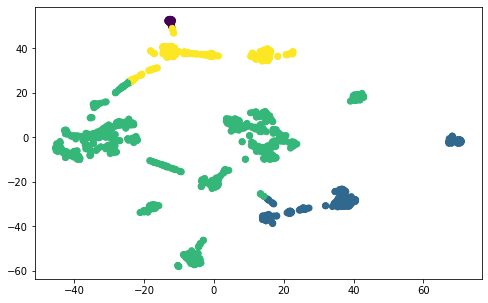

In [ ]:
t_sne = TSNE(2, random_state=0)
plt.figure(figsize=(8,5))
plt.scatter(t_sne.fit_transform(X_train)[:, 0], t_sne.fit_transform(X_train)[:, 1], c=km_preds, cmap='viridis');

### (4) Apply Dimensionality Reduction (DR) methods to data

#### (4.1) Principal Component Analysis (PCA)

##### (4.1.1) GNB

In [ ]:
NB_model = GaussianNB()
n_acc_NB_pca = dict()
for i  in range(1,33,1):
 # apply pca 
  pca =PCA(n_components = i )
  X_train_pca= pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  # APPLY GNB
  model_pca = NB_model.fit(X_train_pca,y_train)
  y_pred_nb_pca = model_pca.predict(X_test_pca)
  test_accuracy_nb_pca = accuracy_score(y_test, y_pred_nb_pca) 
  n_acc_NB_pca[i] = test_accuracy_nb_pca
  improved_base_NB_pca =  n_acc_NB_pca[max(n_acc_NB_pca)]

Maximum accuracy of GNB based PCA: 0.5239616613418531
base GNB accuracy: 0.5143769968051118
Best number of features: 18 



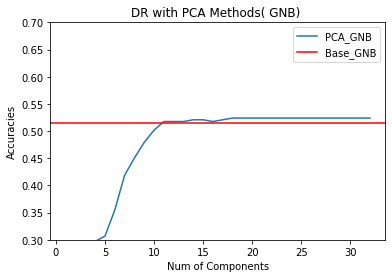

In [ ]:
print("Maximum accuracy of GNB based PCA:", n_acc_NB_pca[max(n_acc_NB_pca)])
print("base GNB accuracy:",test_accuracy_nb_base)
print("Best number of features:", max(n_acc_NB_pca, key=n_acc_NB_pca.get),'\n')

NB_scores_pca = sorted(n_acc_NB_pca.items()) # sorted by key, return a list of tuples
x_nb_pca, y_nb_pca = zip(*NB_scores_pca) # unpack a list of pairs into two tuples
plt.plot(x_nb_pca, y_nb_pca, label = "PCA_GNB")
plt.axhline(y=test_accuracy_nb_base, color='r', linestyle='-' , label = "Base_GNB")
plt.title('DR with PCA Methods( GNB) ')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.legend()
plt.ylim(0.3,0.7)

plt.show()

##### (4.1.2) SVM

In [ ]:
svm_model = svm.SVC()
n_acc_svm_pca= dict()
for i  in range(1,33,1):
 # apply pca 
  pca =PCA(n_components = i )
  X_train_pca= pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
# APPLY SVM 
  svm_model.fit(X_train_pca,y_train)
  y_pred_svm_pca= svm_model.predict(X_test_pca)
  test_accuracy_svm_pca = accuracy_score(y_test,y_pred_svm_pca) 
  n_acc_svm_pca[i] = test_accuracy_svm_pca
  improved_base_svm_pca=  n_acc_svm_pca[max(n_acc_svm_pca)]

Maximum accuracy of SVM based on PCA: 0.16613418530351437
base SVM  accuracy: 0.12140575079872204
Best number of features: 1 



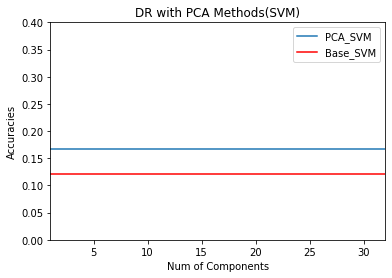

In [ ]:
print("Maximum accuracy of SVM based on PCA:", n_acc_svm_pca[max(n_acc_svm_pca)])
print("base SVM  accuracy:", test_accuracy_svm_base)
print("Best number of features:", max(n_acc_svm_pca, key=n_acc_svm_pca.get),'\n')
svm_scores_pca = sorted(n_acc_svm_pca.items()) # sorted by key, return a list of tuples
x_svm_pca, y_svm_pca = zip(*svm_scores_pca) # unpack a list of pairs into two tuples
plt.plot(x_svm_pca, y_svm_pca ,label = "PCA_SVM")
plt.axhline(y=test_accuracy_svm_base, color='r', linestyle='-' , label = "Base_SVM")
plt.title('DR with PCA Methods(SVM)')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.legend()
plt.ylim(0,0.4)
plt.xlim(1 ,32)
plt.show()

#### (4.2) Linear Discriminat Analysis (LDA)

##### (4.2.1) GNB _LDA

In [ ]:
NB_model = GaussianNB()
n_acc_NB_lda = dict()
for i  in range(1,33,1):
 # apply lda 
  lda =LinearDiscriminantAnalysis(n_components= i)
  X_train_lda_GNB= lda.fit_transform(X_train, y_train)
  X_test_lda_GNB = lda.transform(X_test)
  # APPLY GNB
  model_lda = NB_model.fit(X_train_lda_GNB,y_train)
  y_pred_nb_lda = model_lda.predict(X_test_lda_GNB)
  test_accuracy_nb_lda = accuracy_score(y_test, y_pred_nb_lda) 
  n_acc_NB_lda[i] = test_accuracy_nb_lda
  improved_base_NB_lda =  n_acc_NB_lda[max(n_acc_NB_lda)]

Maximum accuracy of GNB based on LDA  : 0.9616613418530351
base GNB accuracy: 0.5143769968051118
Best number of features: 10 



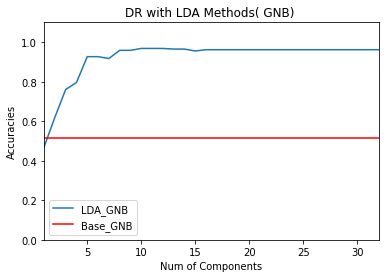

In [ ]:
print("Maximum accuracy of GNB based on LDA  :", n_acc_NB_lda[max(n_acc_NB_lda)])
print("base GNB accuracy:",test_accuracy_nb_base)
print("Best number of features:", max(n_acc_NB_lda, key=n_acc_NB_lda.get),'\n')
NB_scores_lda = sorted(n_acc_NB_lda.items()) # sorted by key, return a list of tuples
x_nb_lda, y_nb_lda = zip(*NB_scores_lda) # unpack a list of pairs into two tuples
plt.plot(x_nb_lda, y_nb_lda, label = "LDA_GNB")
plt.axhline(y=test_accuracy_nb_base, color='r', linestyle='-' , label = "Base_GNB")
plt.title('DR with LDA Methods( GNB) ')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.legend()
plt.ylim(0,1.1)
plt.xlim(1,32)
plt.show()

##### (4.2.2) SVM_lda

In [ ]:
svm_model = svm.SVC()
n_acc_svm_lda= dict()
for i  in range(1,33,1):
 # apply lda
  lda =LinearDiscriminantAnalysis(n_components = i )
  X_train_lda= lda.fit_transform(X_train, y_train)
  X_test_lda = lda.transform(X_test)
# APPLY SVM 
  svm_model.fit(X_train_lda,y_train)
  y_pred_svm_lda= svm_model.predict(X_test_lda)
  test_accuracy_svm_lda = accuracy_score(y_test,y_pred_svm_lda) 
  n_acc_svm_lda[i] = test_accuracy_svm_lda
  improved_base_svm_lda =  n_acc_svm_lda[max(n_acc_svm_lda)]

Maximum accuracy of SVM based LDA : 0.9776357827476039
Base SVM  accuracy: 0.12140575079872204
Best number of features: 10 



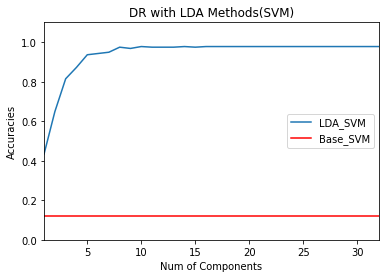

In [ ]:
print("Maximum accuracy of SVM based LDA :", n_acc_svm_lda[max(n_acc_svm_lda)])
print("Base SVM  accuracy:",test_accuracy_svm_base)
print("Best number of features:", max(n_acc_svm_lda, key=n_acc_svm_lda.get),'\n')
svm_scores_lda = sorted(n_acc_svm_lda.items()) # sorted by key, return a list of tuples
x_svm_lda, y_svm_lda = zip(*svm_scores_lda) # unpack a list of pairs into two tuples
plt.plot(x_svm_lda, y_svm_lda ,label = "LDA_SVM")
plt.axhline(y=test_accuracy_svm_base, color='r', linestyle='-' , label = "Base_SVM")
plt.title('DR with LDA Methods(SVM)')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.legend()
plt.ylim(0, 1.1)
plt.xlim(1,32)

plt.show()

### **best results of svm with lda dimentionality reduction (10 component with 0.977 accuracy) Features from 0 : 9** 
- lda_results_tr= X_train_lda[:,[0,1,2,3,4,5,6,7,8,9]]
- lda_results_ts= X_test_lda[:,[0,1,2,3,4,5,6,7,8,9]]

In [ ]:
# best results of svm with lda dimentionality reduction (10 component with 0.977 accuracy )
lda_results_tr= X_train_lda[:,[0,1,2,3,4,5,6,7,8,9]]
lda_results_ts= X_test_lda[:,[0,1,2,3,4,5,6,7,8,9]]

### (5) Feature Selection methods

### based on the best dimensionality reduction transformation ( LDA) we will use **lda_results_tr** and **lda_results_ts**

#### (5.1) Filter Methods (Information Gain)

In [ ]:
def select_feature(X_TR, y_TR, X_TS, y_TS, FSM, MODEL):
  fs = FSM
  fs.fit(X_TR, y_TR)
  X_TR_new = fs.transform(X_TR)
  X_TS_new = fs.transform(X_TS) 
  MODEL.fit(X_TR_new, y_TR)
  yPred = MODEL.predict(X_TS_new)
  acc = accuracy_score(y_TS, yPred) * 100
  return acc

##### (5.1.1) GNB

Maximum accuracy: 0.9680511182108628
Base GNB accuracy: 0.9616613418530351
Best number of features: 10 



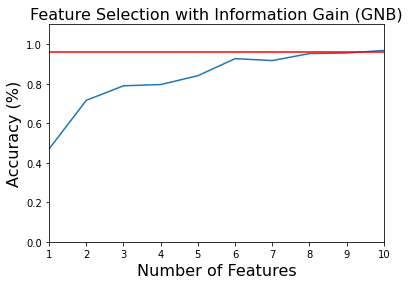

In [ ]:
model_IG = GaussianNB()
acc_dict = {}
for nf in range(1,11):
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  acc = select_feature(lda_results_tr, y_train, lda_results_ts, y_test, fsm, model_IG)
  acc_dict[nf] = acc/100

plt.plot(*zip(*sorted(acc_dict.items())))
plt.axhline(y=improved_base_NB_lda, color='r', linestyle='-' , label = "Base GNB")
Title = "Feature Selection with Information Gain (GNB)"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.ylim(0,1.1)
plt.xlim(1,10)

print("Maximum accuracy:", max(acc_dict.values()))
print("Base GNB accuracy:", improved_base_NB_lda)
print("Best number of features:", max(acc_dict, key=acc_dict.get), '\n')

##### (5.1.2) SVM

Maximum SVM_FS accuracy: 0.952076677316294
 The Improved Base SVM accuracy: 0.9776357827476039
Best number of features: 8 



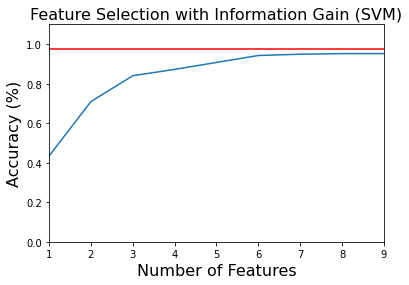

In [ ]:
model_IG = svm.SVC()
acc_dict = {}
for nf in range(1,10):
  fsm =  SelectKBest(mutual_info_classif, k=nf)
  acc = select_feature(lda_results_tr, y_train, lda_results_ts, y_test, fsm, model_IG)
  acc_dict[nf] = acc/100

plt.plot(*zip(*sorted(acc_dict.items())))
plt.axhline(y=improved_base_svm_lda, color='r', linestyle='-' , label = "Base GNB")
Title = "Feature Selection with Information Gain (SVM)"
plt.title(Title, fontsize=16)
plt.xlabel("Number of Features", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.ylim(0,1.1)
plt.xlim(1,9)

print("Maximum SVM_FS accuracy:", max(acc_dict.values()))
print(" The Improved Base SVM accuracy:", improved_base_svm_lda)

print("Best number of features:", max(acc_dict, key=acc_dict.get) ,'\n')

#### (5.1) filter out with an Alternative method using the original data 

In [ ]:
pokemon_train['type1'] = pd.DataFrame(le.fit_transform(y_train))
pokemon_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1
0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000,2.000000,2.000000,2.000000,95.000000,7680.000000,70.000000,355.000000,45.000000,50.000000,6.000000e+05,0.700000,45.000000,88.100000,347.000000,40.000000,50.000000,75.000000,14
1,0.990403,1.0,0.990403,1.000000,0.990403,2.038386,0.509597,0.495202,1.0,1.980807,2.038386,0.990403,0.495202,0.490403,0.990403,0.990403,1.980807,2.000000,133.464544,3864.567294,70.000000,515.191932,45.287898,130.287898,1.058711e+06,1.694242,84.520170,50.000000,525.040340,60.287898,81.343524,25.287898,14
2,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,0.500000,1.000000,1.0,2.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,70.000000,5120.000000,70.000000,310.000000,45.000000,50.000000,1.059860e+06,0.400000,50.000000,88.100000,258.000000,50.000000,50.000000,40.000000,16
3,0.500000,1.0,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,1.0,0.500000,2.000000,0.500000,1.000000,1.000000,1.000000,2.000000,0.500000,2.000000,123.588302,8491.030113,70.000000,527.747870,42.252130,61.282340,1.000000e+06,1.028234,66.831914,85.773470,196.636341,100.495741,107.252130,68.297445,6
4,0.334368,0.5,0.000000,1.662527,1.000000,0.334368,1.000000,1.000000,1.0,0.668737,0.337473,1.662527,1.000000,2.000000,1.000000,1.662527,2.000000,1.000000,56.749463,2560.000000,93.623119,524.076666,28.312634,87.575591,8.000000e+05,1.432505,88.374731,66.670456,322.211607,111.563172,106.563172,73.250537,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1.000000,1.0,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.0,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,59.114137,5120.000000,70.000000,434.308344,160.178881,54.141396,1.000000e+06,0.782283,64.778534,50.000000,379.218049,76.592845,77.991483,101.689948,3
1247,0.250000,0.5,0.000000,2.000000,1.000000,0.250000,1.000000,1.000000,1.0,0.500000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,46.039017,2560.000000,70.000000,489.546241,47.824422,91.039017,8.000000e+05,1.143512,73.117052,88.100000,352.339304,104.156069,111.039017,64.156069,4
1248,1.000000,1.0,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,56.924721,7779.092938,45.763476,455.806227,89.591543,91.548327,1.000000e+06,0.769247,60.387082,76.383188,437.171933,105.397770,81.161245,60.387082,10
1249,0.918972,1.0,1.000000,0.324110,1.000000,0.459486,2.000000,2.000000,1.0,0.878459,0.418972,2.000000,1.000000,0.581028,1.000000,1.486165,1.000000,1.837945,52.292479,3840.000000,70.000000,296.790468,233.122563,82.707521,6.000000e+05,0.548617,35.861653,50.000000,290.162055,33.241102,33.241102,59.446611,0


In [ ]:
importance = pokemon_train.drop('type1', axis = 1).apply(lambda x  : x.corr(pokemon_train.type1))
indices = np.argsort(importance)
print(importance[indices])

against_fairy       -0.446854
against_flying      -0.381449
against_poison      -0.346484
against_rock        -0.271796
against_ice         -0.258071
against_normal      -0.251440
against_dragon      -0.187070
against_fire        -0.167996
speed               -0.123896
sp_attack           -0.087738
base_happiness      -0.033684
against_bug         -0.020379
against_psychic     -0.010615
pokedex_number      -0.006083
percentage_male     -0.004164
sp_defense          -0.003682
base_egg_steps       0.001152
capture_rate         0.003675
against_steel        0.004915
attack               0.011595
experience_growth    0.015561
base_total           0.060421
against_ghost        0.095311
hp                   0.104245
against_water        0.162308
height_m             0.197808
against_electric     0.235029
against_dark         0.265450
defense              0.267788
against_ground       0.277070
against_fight        0.290690
against_grass        0.408586
dtype: float64


In [ ]:
important_features = pokemon_train[[ "against_normal","against_dragon" ,"against_fire","speed" ,"against_electric" ,"against_dark",
                                    "defense", "against_ground","against_grass"]]

new_test =pokemon_test[[ "against_normal","against_dragon" ,"against_fire","speed" ,"against_electric" ,"against_dark",
                                    "defense", "against_ground","against_grass"]]

In [ ]:
for i in range(0,len(important_features.columns)):
    for j in  range(0,len(important_features.columns)):
        if i!=j:
            corr_1=np.abs(important_features[important_features.columns[i]].corr(important_features[important_features.columns[j]]))
            if corr_1 <0.6:
                print( important_features.columns[i] , " is not correlated  with ", important_features.columns[j])
            else:
                print( important_features.columns[i] , " is highly  correlated  with ", important_features.columns[j])

against_normal  is not correlated  with  against_dragon
against_normal  is not correlated  with  against_fire
against_normal  is not correlated  with  speed
against_normal  is not correlated  with  against_electric
against_normal  is not correlated  with  against_dark
against_normal  is not correlated  with  defense
against_normal  is not correlated  with  against_ground
against_normal  is not correlated  with  against_grass
against_dragon  is not correlated  with  against_normal
against_dragon  is not correlated  with  against_fire
against_dragon  is not correlated  with  speed
against_dragon  is not correlated  with  against_electric
against_dragon  is not correlated  with  against_dark
against_dragon  is not correlated  with  defense
against_dragon  is not correlated  with  against_ground
against_dragon  is not correlated  with  against_grass
against_fire  is not correlated  with  against_normal
against_fire  is not correlated  with  against_dragon
against_fire  is not correlated  w

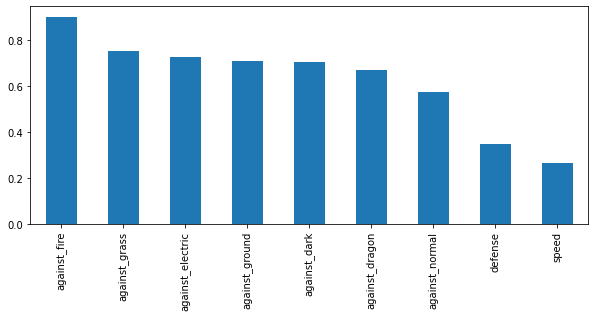

In [ ]:
from sklearn.feature_selection import mutual_info_classif 
# find the informatiom gain of the indenpendent variables 
mi = mutual_info_classif(important_features , y_train)
mi = pd.Series(mi)
mi.index = important_features.columns
mi.sort_values(ascending = False)
mi.sort_values(ascending =False).plot.bar(figsize=(10,4))


 testing accuracy :   0.824 

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       1.00      0.35      0.52        20
           2       0.94      1.00      0.97        16
           3       0.50      1.00      0.67        16
           4       0.82      1.00      0.90         9
           5       0.70      0.95      0.81        22
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00        17
           8       0.88      0.83      0.86        18
           9       0.86      0.90      0.88        21
          10       0.74      0.95      0.83        21
          11       0.78      0.29      0.42        24
          12       0.82      0.70      0.76        20
          13       0.96      0.96      0.96        23
          14       0.79      0.73      0.76        15
          15       0.95      1.00      0.97        19
          16       0.94      0.83      0.88       

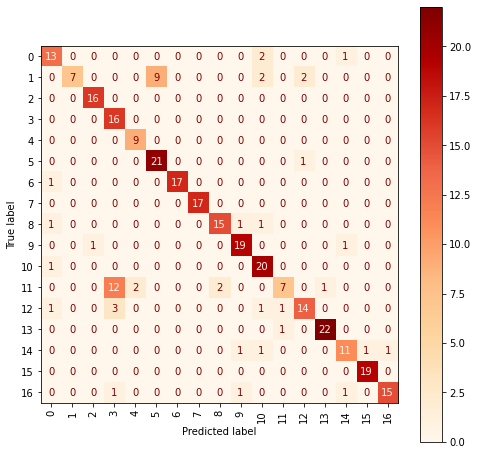

In [ ]:
NB_model = GaussianNB()
NB_model.fit(important_features.values,y_train)
y_predic_test = NB_model.predict(new_test.values)
test_accuracy_fs = accuracy_score(y_test, y_predic_test) 
print("\n testing accuracy :  "  ,round(test_accuracy_fs,3),"\n")
print(classification_report(y_test, y_predic_test))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB_model, new_test.values, y_test, xticks_rotation='vertical',cmap=plt.cm.OrRd, ax=ax );


 testing accuracy :   0.211 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        20
           2       0.44      0.44      0.44        16
           3       0.16      0.56      0.25        16
           4       0.12      1.00      0.21         9
           5       0.12      0.09      0.11        22
           6       0.19      0.22      0.21        18
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        21
          11       0.10      0.08      0.09        24
          12       0.21      0.60      0.31        20
          13       0.17      0.04      0.07        23
          14       0.25      0.33      0.29        15
          15       0.71      0.79      0.75        19
          16       0.00      0.00      0.00       

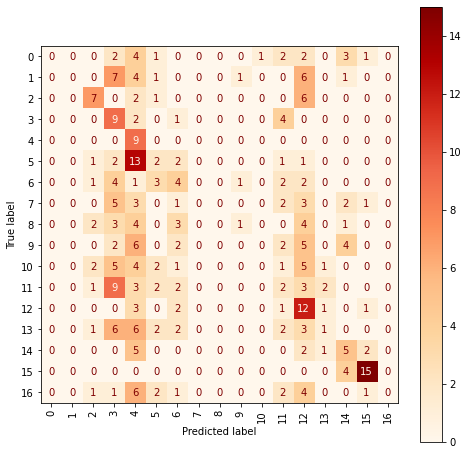

In [ ]:
svm_model = svm.SVC()
svm_model.fit(important_features,y_train)
y_predic_test2 = svm_model.predict(new_test.values)
test_accuracy_svm = accuracy_score(y_test, y_predic_test2) 
print("\n testing accuracy :  "  ,round(test_accuracy_svm,3),"\n")
print(classification_report(y_test, y_predic_test2))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model, new_test.values, y_test, xticks_rotation='vertical', cmap=plt.cm.OrRd, ax=ax);

#### (5.2) Wrapper Methods (Forward)

##### (5.2.1) GNB

In [ ]:
sfs = SFS(GaussianNB(),
          k_features = 10,
          forward = True,
          floating = False ,
          scoring = 'accuracy',
          cv = 5)
sfs.fit(lda_results_tr , y_train)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=GaussianNB(priors=None,
                                               var_smoothing=1e-09),
                          floating=False, forward=True, k_features=10, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [ ]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
print( " avg_score  represent the cross validation score for each numbers of features \n")
display(df_SFS_results[['feature_names','cv_scores', 'avg_score']])

 avg_score  represent the cross validation score for each numbers of features 



,feature_names,cv_scores,avg_score
1,"(0,)","[0.49800796812749004, 0.508, 0.508, 0.464, 0.488]",0.493202
2,"(0, 4)","[0.7689243027888446, 0.784, 0.72, 0.724, 0.772]",0.753785
3,"(0, 2, 4)","[0.8884462151394422, 0.896, 0.868, 0.856, 0.884]",0.878489
4,"(0, 2, 4, 8)","[0.9043824701195219, 0.916, 0.928, 0.936, 0.924]",0.921676
5,"(0, 2, 4, 7, 8)","[0.9322709163346613, 0.948, 0.932, 0.944, 0.932]",0.937654
6,"(0, 2, 4, 6, 7, 8)","[0.9442231075697212, 0.948, 0.948, 0.96, 0.948]",0.949645
7,"(0, 2, 4, 6, 7, 8, 9)","[0.952191235059761, 0.956, 0.968, 0.96, 0.96]",0.959238
8,"(0, 2, 4, 5, 6, 7, 8, 9)","[0.9681274900398407, 0.964, 0.964, 0.968, 0.96]",0.964825
9,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9641434262948207, 0.972, 0.96, 0.968, 0.964]",0.965629
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9760956175298805, 0.972, 0.964, 0.972, 0.96]",0.968819


In [ ]:
df_sfs = df_SFS_results[df_SFS_results.avg_score == max(df_SFS_results.avg_score)]
l = df_sfs.feature_idx.to_list()
l = list(l[0])
display(df_sfs[['feature_names','cv_scores', 'avg_score']])
forward_train = lda_results_tr[:,l]
forward_test = lda_results_ts[:,l]

,feature_names,cv_scores,avg_score
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9760956175298805, 0.972, 0.964, 0.972, 0.96]",0.968819


Maximum  GBN_LDA accuracy is :  0.9688191235059762 
and it had achieved using :  10  components

 The Improved Base accuracy of GNB is :  0.9616613418530351 



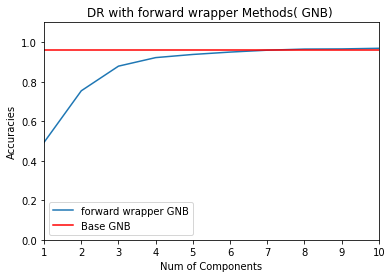

In [ ]:
print ('Maximum  GBN_LDA accuracy is : ',df_sfs.avg_score.values[0] ,
       "\nand it had achieved using : ",df_sfs.index.values[0] ,
       " components\n")
print(" The Improved Base accuracy of GNB is : " ,improved_base_NB_lda ,'\n')
plt.plot(df_SFS_results.index , df_SFS_results.avg_score, label = "forward wrapper GNB")
plt.axhline(y=improved_base_NB_lda, color='r', linestyle='-' , label = "Base GNB")
plt.title('DR with forward wrapper Methods( GNB) ')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.ylim(0,1)
plt.legend()
plt.ylim(0,1.1)
plt.xlim(1,10)

plt.show()


 testing accuracy of GNB using LDA with 10 Components  :   0.968 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.87      1.00      0.93        20
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       0.95      1.00      0.97        18
           9       0.91      0.95      0.93        21
          10       1.00      0.95      0.98        21
          11       1.00      1.00      1.00        24
          12       1.00      0.95      0.97        20
          13       1.00      0.96      0.98        23
          14       0.93      0.87      0.90        15
          15       1.00      1.00      1.00        19
          16 

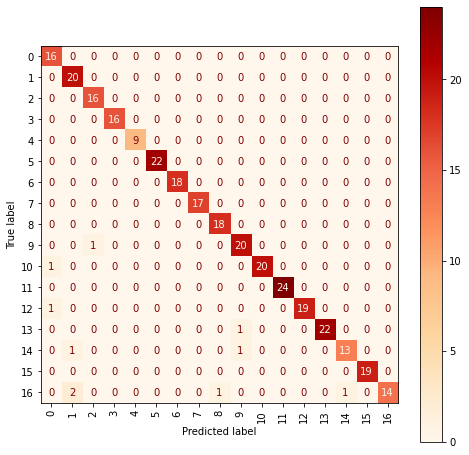

In [ ]:
NB_model = GaussianNB()
NB_model.fit(forward_train,y_train)
y_pred_for = NB_model.predict(forward_test)
test_accuracy_for = accuracy_score(y_test, y_pred_for) 
print("\n testing accuracy of GNB using LDA with 10 Components  :  "  ,round(test_accuracy_for,3),"\n")
print(classification_report(y_test, y_pred_for))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(NB_model, forward_test, y_test, xticks_rotation='vertical', cmap=plt.cm.OrRd, ax=ax);

##### (5.2.2) SVM

In [ ]:
sfs2 = SFS(svm.SVC(),
          k_features = 10,
          forward = True,
          floating = False ,
          scoring = 'accuracy',
          cv = 5)

sfs2.fit(lda_results_tr , y_train)

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                        class_weight=None, coef0=0.0,
                                        decision_function_shape='ovr', degree=3,
                                        gamma='scale', kernel='rbf',
                                        max_iter=-1, probability=False,
                                        random_state=None, shrinking=True,
                                        tol=0.001, verbose=False),
                          floating=False, forward=True, k_features=10, n_jobs=1,
                          pre_dispatch='2*n_jobs', scoring='accuracy',
                          verbose=0)

In [ ]:
df_SFS_results_2 = pd.DataFrame(sfs2.subsets_).transpose()
print( " avg_score  represent the cross validation score for each numbers of features \n")
df_SFS_results_2[['feature_names','cv_scores', 'avg_score']]

 avg_score  represent the cross validation score for each numbers of features 



,feature_names,cv_scores,avg_score
1,"(2,)","[0.5219123505976095, 0.516, 0.544, 0.492, 0.492]",0.513182
2,"(2, 4)","[0.7888446215139442, 0.788, 0.784, 0.76, 0.776]",0.779369
3,"(2, 4, 8)","[0.900398406374502, 0.912, 0.904, 0.924, 0.912]",0.91048
4,"(2, 4, 7, 8)","[0.9442231075697212, 0.964, 0.936, 0.96, 0.936]",0.948045
5,"(2, 4, 6, 7, 8)","[0.9641434262948207, 0.968, 0.96, 0.98, 0.944]",0.963229
6,"(0, 2, 4, 6, 7, 8)","[0.9760956175298805, 0.976, 0.956, 0.98, 0.96]",0.969619
7,"(0, 2, 4, 5, 6, 7, 8)","[0.9760956175298805, 0.984, 0.96, 0.988, 0.968]",0.975219
8,"(0, 2, 4, 5, 6, 7, 8, 9)","[0.9880478087649402, 0.984, 0.964, 0.988, 0.972]",0.97921
9,"(0, 1, 2, 4, 5, 6, 7, 8, 9)","[0.9920318725099602, 0.984, 0.964, 0.988, 0.964]",0.978406
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.9840637450199203, 0.984, 0.956, 0.98, 0.964]",0.973613


In [ ]:
df_sfs_2 = df_SFS_results_2[df_SFS_results_2.avg_score == max(df_SFS_results_2.avg_score)]
l2 = df_sfs_2.feature_idx.to_list()
l2 = list(l2[0])
forward_train_2 = lda_results_tr[:,l2]
forward_test_2 = lda_results_ts[:,l2]
display(df_sfs_2[['feature_names','cv_scores', 'avg_score']])

,feature_names,cv_scores,avg_score
8,"(0, 2, 4, 5, 6, 7, 8, 9)","[0.9880478087649402, 0.984, 0.964, 0.988, 0.972]",0.97921


Maximum  SVM_LDA accuracy is :  0.9792095617529881 
and it had achieved using :  8  components

The Improved Base accuracy of SVM is :  0.9776357827476039 



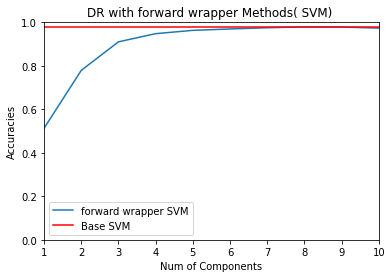

In [ ]:
print ('Maximum  SVM_LDA accuracy is : ',df_sfs_2.avg_score.values[0] ,
       "\nand it had achieved using : ",df_sfs_2.index.values[0] ,
       " components\n")
print("The Improved Base accuracy of SVM is : " ,improved_base_svm_lda ,'\n')

plt.plot(df_SFS_results_2.index , df_SFS_results_2.avg_score, label = "forward wrapper SVM")
plt.axhline(y=improved_base_svm_lda, color='r', linestyle='-' , label = "Base SVM")
plt.title('DR with forward wrapper Methods( SVM) ')
plt.xlabel("Num of Components")
plt.ylabel('Accuracies')
plt.ylim(0,1)
plt.xlim(1,10)

plt.legend()
plt.show()

(The best) apply the SVM  with the best 8 components 

In [ ]:
 com_8 = list(df_sfs_2.feature_idx.values[0])
 com_8

[0, 2, 4, 5, 6, 7, 8, 9]

In [ ]:
forward_train_2_best = lda_results_tr[:,com_8]
forward_test_2_best = lda_results_ts[:,com_8]


 testing accuracy :   0.978 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      1.00      1.00        20
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         9
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        18
           9       0.91      0.95      0.93        21
          10       1.00      1.00      1.00        21
          11       1.00      0.96      0.98        24
          12       1.00      0.95      0.97        20
          13       1.00      0.91      0.95        23
          14       0.93      0.93      0.93        15
          15       1.00      1.00      1.00        19
          16       1.00      0.94      0.97       

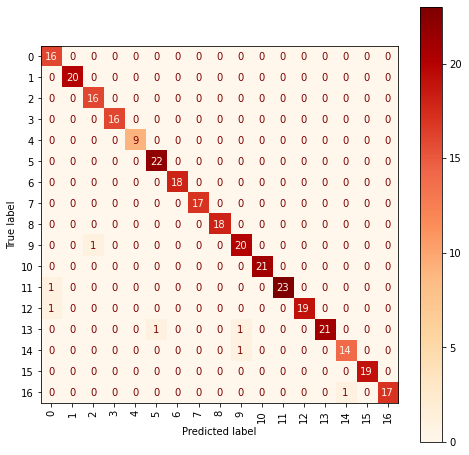

In [ ]:
svm_model = svm.SVC()
svm_model.fit(forward_train_2_best,y_train)
y_pred_for_2 = svm_model.predict(forward_test_2_best)
test_accuracy_for_2 = accuracy_score(y_test, y_pred_for_2) 
print("\n testing accuracy :  "  ,round(test_accuracy_for_2,3),"\n")
print(classification_report(y_test, y_pred_for_2))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model, forward_test_2_best, y_test, xticks_rotation='vertical', cmap=plt.cm.OrRd, ax=ax);

#### based on LDA dimensionality reduction with 10 components and feature selection with forward wrapper (select the most importance components " 8 components" ) we get best accuracy with svm 0.978

### (6) Choose the best number of cluster for k-means clustering algorithm on the processed data

#### (6.1) Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of clusters

In [ ]:
#using the best features or dimensionality from Q4 and Q5 ()
forward_train_2_best = lda_results_tr[:,com_8]
forward_test_2_best = lda_results_ts[:,com_8]

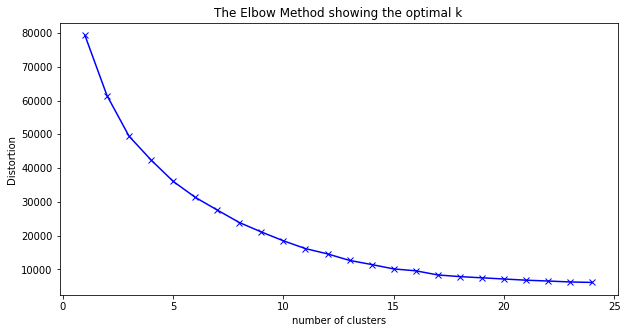

In [ ]:
distortions2 = []
for k in range(1,25):
    km_model2 = KMeans(n_clusters=k)
    km_model2.fit(forward_train_2_best)
    distortions2.append(km_model2.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,25), distortions2, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show();

## (6.2) Determine the optimal number of clusters for k-means
16 

In [ ]:
# the optimal number of clustera is 3
km_model2 = KMeans(n_clusters= 16 )
km_preds2 = km_model.fit_predict(forward_test_2_best)


### (7) Choose the best number of neurons for SOM algorithm using the best features or dimensionality

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
X_train_som = sc.fit_transform(forward_train_2_best)
X_test_som = sc.fit_transform(forward_test_2_best)
pd.DataFrame(X_train_som)

,0,1,2,3,4,5,6,7
0,0.379497,0.625097,0.418644,0.260269,0.261749,0.086623,0.121159,0.280382
1,0.405824,0.790804,0.322992,0.285462,0.213391,0.371525,0.047568,0.306321
2,0.379113,0.567041,0.302280,0.524822,0.148454,0.557649,0.183823,0.636449
3,0.206176,0.118443,0.188431,0.649722,0.194937,0.228144,0.134292,0.210801
4,0.537377,0.710881,0.240914,0.465880,0.457119,0.210939,0.264084,0.314510
...,...,...,...,...,...,...,...,...
1246,0.239273,0.300516,0.284195,0.704449,0.378731,0.516123,0.342495,0.271371
1247,0.530196,0.723885,0.253110,0.446605,0.465104,0.245642,0.295082,0.328806
1248,0.395443,0.609790,0.732351,0.158531,0.229949,0.221392,0.236249,0.130718
1249,0.339234,0.345475,0.543956,0.225523,0.395845,0.443357,0.347003,0.346963


#### (7.1) Using the elbow rule, plot the distortion score (a.k.a inertia) vs the number of neurons (max 30 neurons)

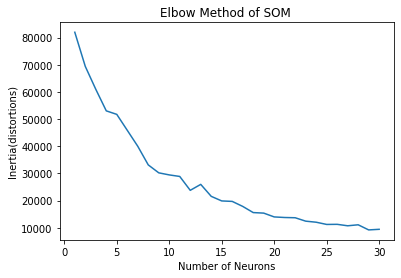

In [ ]:
from sklearn_som.som import SOM
distorations_som = []
df_som = pd.DataFrame(forward_train)
for i in range(1,31):
  SOM_model = SOM(m=i, n=1,
                  dim=forward_train_2_best.shape[1],
                  max_iter=3000,
                  random_state=1)
  
  SOM_pred = SOM_model.fit_predict(forward_train_2_best)
  distorations_som.append((SOM_model.inertia_,i))

df_som['Pred'] = SOM_pred
dist = pd.DataFrame(distorations_som, columns=['Inertias','Num of Neurons'])
plt.plot(dist['Num of Neurons'], dist['Inertias'])
plt.title("Elbow Method of SOM ")
plt.xlabel("Number of Neurons")
plt.ylabel("Inertia(distortions)")
plt.show()

#### (7.2)  the optimal number of neurons for SOM equal 15


##### (7.3) Plot the initial and final Neuron positions

In [ ]:
# Set the hyper parameters
som_grid_rows = 4
som_grid_columns = 4
iterations = 1000
sigma = 1
learning_rate = 0.5

[[0.31092682 0.59737286 0.5892029  0.4675928 ]
 [0.60737088 0.80603229 0.90022851 0.65307211]
 [0.65522432 0.90104601 1.         0.72705571]
 [0.37509916 0.78271736 0.79801671 0.51864805]] 



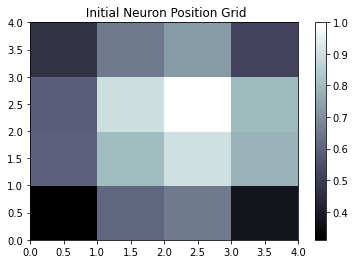

In [ ]:
np.random.seed(42)
# define SOM:
som_init = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=8, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som_init.random_weights_init(X_train_som)
print(som_init.distance_map(), "\n")
bone()
pcolor(som_init.distance_map().T )       # Distance map as background
plt.title(" Initial Neuron Position Grid")
colorbar()
show()



[[0.31092682 0.59737286 0.5892029  0.4675928 ]
 [0.60737088 0.80603229 0.90022851 0.65307211]
 [0.65522432 0.90104601 1.         0.72705571]
 [0.37509916 0.78271736 0.79801671 0.51864805]] 



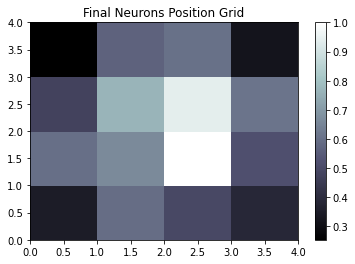

In [ ]:

som_fin = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=8, sigma=sigma, learning_rate=learning_rate)
som_fin.train_random(X_train_som, iterations)
som_fin.distance_map()
print(som_init.distance_map(), "\n")

bone()
pcolor(som_fin.distance_map().T)       # Distance map as background
colorbar()
plt.title("Final Neurons Position Grid")
show()

### (8) Tune the epsilon (0.2-3) and minpoints (2-15) values in the given intervals by using DBSCAN

In [ ]:
def unsupervisedLabelMap(labels, y):
    labelDict = dict()
    for label in unique_labels(labels):
        tmpY = y[labels == label]
        unique, count = np.unique(tmpY, return_counts=True)
        trueLabel = unique[np.argmax(count)]
        labelDict[label] = trueLabel
    return labelDict


def usLabels2sLabels(labels, y):
    sLabels = np.empty(labels.shape, labels.dtype)
    labelDict = unsupervisedLabelMap(labels, y)
    for usl, tl in labelDict.items():
        sLabels[labels == usl] = tl
    return sLabels

#### (8.1) Using original Training Data

100%|██████████| 14/14 [00:06<00:00,  2.05it/s]


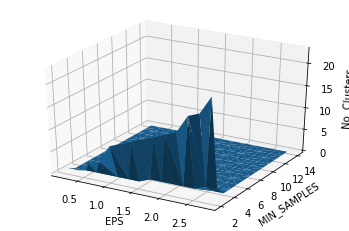

2.8000000000000003 2 0.09992006394884093 23 1203


In [ ]:
rs = 0
X, y = X_train, y_train
_, dim = X.shape
classes = unique_labels(y)

epsList, msList, accList, n_clusters, n_noise = list(), list(), list(), list(), list()
for eps in tqdm(np.arange(0.2, 3, 0.2)):
  for ms in range(2, 15):
    model = DBSCAN(eps=eps, min_samples=ms)
    predClusters = model.fit_predict(X)
    predY = usLabels2sLabels(predClusters, y)
    accuracy = accuracy_score(y, predY)
    labels = model.labels_
    cluster = len(set(labels)) - (1 if -1 in labels else 0)
    noise = list(labels).count(-1)
    epsList.append(eps)
    msList.append(ms)
    accList.append(accuracy)
    n_clusters.append(cluster)
    n_noise.append(noise)

epsList, msList, accList, n_clusters = np.array(epsList), np.array(msList), np.array(accList), np.array(n_clusters)
ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList, msList, n_clusters)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
i = accList.argmax()
print(epsList[i], msList[i], accList[i], n_clusters[i], n_noise[i])

##### EPS = 2.8, min_samples = 2, Accuracy = 0.09, no. clusters = 23, noise = 1203

##### 10 combination of epsilon and minpoints that brings you closer to the desired cluster number

In [ ]:
db_df1 = pd.DataFrame(list(zip(epsList, msList, accList, n_clusters, n_noise)),
                      columns =['eps', 'min_samples', 'accuracy', 'cluster', 'noise'])

combination1_10= db_df1[db_df1.cluster.isin(range(2,16))]
combination1_10

,eps,min_samples,accuracy,cluster,noise
26,0.6,2,0.071143,3,1245
39,0.8,2,0.072742,4,1243
52,1.0,2,0.077538,8,1235
65,1.2,2,0.079137,9,1233
78,1.4,2,0.079137,10,1231
91,1.6,2,0.081535,11,1228
104,1.8,2,0.083133,12,1226
117,2.0,2,0.084732,13,1224
130,2.2,2,0.086331,14,1222
157,2.6,3,0.071143,2,1245


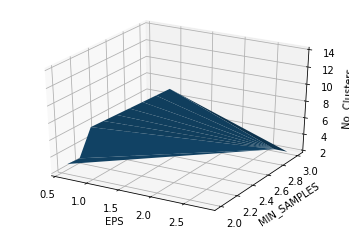

2.2 2 0.08633093525179857 14 1222


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(combination1_10.eps, combination1_10.min_samples, combination1_10.cluster)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
ix = combination1_10[combination1_10.accuracy == combination1_10.accuracy.max()]
print(ix.eps.values[0], ix.min_samples.values[0], ix.accuracy.values[0], ix.cluster.values[0], ix.noise.values[0])

##### EPS = 2.2, min_samples = 2, Accuracy = 0.086, no. clusters = 14, noise = 1222

#### (8.2) Using LDA (Wrapper with 8 Components)

100%|██████████| 14/14 [00:03<00:00,  3.77it/s]


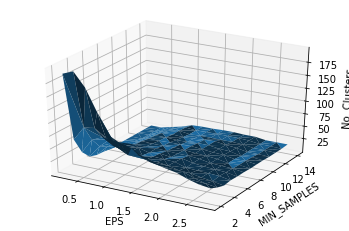

1.6 2 0.9536370903277378 64 55


In [ ]:
rs = 0
X, y = forward_train_2_best, y_train
_, dim = X.shape
classes = unique_labels(y)

epsList, msList, accList, n_clusters, n_noise = list(), list(), list(), list(), list()
for eps in tqdm(np.arange(0.2, 3, 0.2)):
  for ms in range(2, 15):
    model = DBSCAN(eps=eps, min_samples=ms)
    predClusters = model.fit_predict(X)
    predY = usLabels2sLabels(predClusters, y)
    accuracy = accuracy_score(y, predY)
    labels = model.labels_
    cluster = len(set(labels)) - (1 if -1 in labels else 0)
    noise = list(labels).count(-1)
    epsList.append(eps)
    msList.append(ms)
    accList.append(accuracy)
    n_clusters.append(cluster)
    n_noise.append(noise)

epsList, msList, accList, n_clusters = np.array(epsList), np.array(msList), np.array(accList), np.array(n_clusters)
ax = plt.axes(projection='3d')
ax.plot_trisurf(epsList, msList, n_clusters)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
i = accList.argmax()
print(epsList[i], msList[i], accList[i], n_clusters[i], n_noise[i])

##### EPS = 1.6, min_samples = 2, Accuracy = 0.953, no. clusters = 64, noise = 55

##### 10 combination of epsilon and minpoints that brings you closer to the desired cluster number

In [ ]:
db_df2 = pd.DataFrame(list(zip(epsList, msList, accList, n_clusters, n_noise)),
                      columns =['eps', 'min_samples', 'accuracy', 'cluster', 'noise'])

combination2_10= db_df2[db_df2.cluster.isin([16])]
combination2_10= combination2_10[0:10]
combination2_10

,eps,min_samples,accuracy,cluster,noise
151,2.4,10,0.864908,16,144
152,2.4,11,0.863309,16,148
153,2.4,12,0.850520,16,164
154,2.4,13,0.850520,16,165
155,2.4,14,0.847322,16,174
165,2.6,11,0.868905,16,134
166,2.6,12,0.869704,16,135
167,2.6,13,0.860911,16,146
168,2.6,14,0.860911,16,146
171,2.8,4,0.692246,16,48


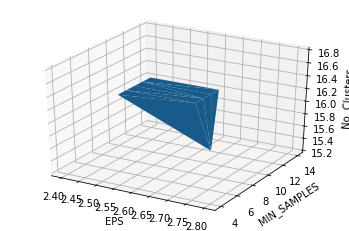

2.6000000000000005 12 0.8697042366107114 16 135


In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(combination3_10.eps, combination3_10.min_samples, combination3_10.cluster)
ax.set_xlabel('EPS')
ax.set_ylabel('MIN_SAMPLES')
ax.set_zlabel('No. Clusters')
plt.show()
ix2 = combination2_10[combination2_10.accuracy == combination2_10.accuracy.max()]
print(ix2.eps.values[0], ix2.min_samples.values[0], ix2.accuracy.values[0], ix2.cluster.values[0], ix2.noise.values[0])

##### EPS = 2.6, min_samples = 12, Accuracy = 0.869, no. clusters = 16, noise = 135